In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot

In [2]:
#Defining the position states 

x_limit = 41
y_limit = 41
step_count = 15
x_ket = np.zeros(x_limit)
y_ket = np.zeros(y_limit)
x_ket[(x_limit//2)] = 1
y_ket[(y_limit//2)] = 1
y_ket.shape

# Defining the Spin States 

# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)

# Perform the outer product
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1,1)
down_matrix = down_t @ down.reshape(1,-1)

#Sx 
n = x_limit * y_limit
S_right_x = np.zeros((n,n))
S_left_x = np.zeros((n,n))
# |i+1><i|
for i in range(0,x_limit-1):
    for j in  range(0,y_limit):
        S_right_x[i+j*x_limit][i+1+j*x_limit] = 1
# |i-1><i|
for i in range(1,x_limit):
    for j in range(0,y_limit):
        S_left_x [i+j*y_limit][i-1+j*y_limit] = 1
S1_x = np.kron(S_right_x,down_matrix)
S2_x = np.kron(S_left_x,up_matrix)
S_x = S1_x + S2_x

#Sy 
S_left_y = np.zeros((n,n))
S_right_y = np.zeros((n,n))
# |i+n><i|
for i in range (0,x_limit):
    for j in range(0,y_limit-2):
        S_right_y[i+y_limit*(j+1)][i+y_limit*(j+2)] = 1
# |i-n><i| 
for i in range(0,x_limit):
    for j in range(1,y_limit):
        S_left_y[i + y_limit*j][i+y_limit*(j-1)]=1
S_y = S_left_y + S_right_y
S1_y = np.kron(S_right_y,down_matrix)
S2_y = np.kron(S_left_y,up_matrix)
S_y = S1_y + S2_y


## Coin change function 

In [3]:
def coin_change(i):
    theta = (2*np.pi*i)/(step_count-1)
    coin = np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),-np.cos(theta)]])
    coin_adj = np.kron(np.eye(n,n),coin)
    return coin_adj

## Defining new spin operators

In [4]:
i = 0
theta = (2*np.pi*i)/step_count
coin = np.array([[np.cos(theta),np.sin(theta)],[np.sin(theta),np.cos(theta)]])



In [5]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,up)
zero_ket.shape
print(init_state)

[0. 0. 0. ... 0. 0. 0.]


# 1. |Φi⟩ =|12>X|↑> 

In [6]:
state = init_state
coin_vari = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
coin_adj = np.kron(np.eye(n,n),coin_vari)
print(state)
i = 0

for i in range (0,step_count):
    coin_adj = coin_change(i)
    # print(coin_adj)
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))

grid2 = pos_prob.reshape(x_limit,y_limit)
# print(grid2)

[0. 0. 0. ... 0. 0. 0.]
0.9999999999999999


# 2. |Φi⟩ = |↓>  X | 12 >  

In [7]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,down)
zero_ket.shape
print(init_state)

state = init_state
coin_vari = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
coin_adj = np.kron(np.eye(n,n),coin_vari)
print(state)
i = 0

for i in range (0,step_count):
    coin_adj = coin_change(i)
    # print(coin_adj)
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))

grid3 = pos_prob.reshape(x_limit,y_limit)
# print(grid2)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
0.9999999999999999


In [8]:
up_coef = 1/np.sqrt(2)
down_coef = 1j/np.sqrt(2)
coin_adj2 = np.kron(np.eye(n,n),coin)
spin_superpos = up_coef*up + down_coef*down
init_state3 = np.kron(zero_ket,spin_superpos)
state = init_state3
plot = []
for i in range (0,step_count):
    coin_adj = coin_change(i)
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
# print(state)
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state by multiplying with its complex conjugate
for i in range(state.shape[0]):
    state_prob[i] = state[i] * np.conjugate(state[i])

pos_prob = np.zeros((n, 1))
# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i].real
    else:
        pos_prob[(i - 1) // 2] += state_prob[i].real
#Convert to 2d grid 
print(np.sum(pos_prob))
grid4 = pos_prob.reshape(x_limit,y_limit)
# max_index = np.unravel_index(np.argmax(grid4), grid4.shape)
# plot.append((k,np.sqrt((x_limit//2 - max_index[0])**2+ (y_limit//2 - max_index[1])**2)))
# for i in range(0,n):
#     x = i % x_limit
#     y = i // y_limit
#     grid4[x][y] = pos_prob[i,0]
# print(grid)

0.9999999999999999


# N Development 

In [9]:

state = init_state3
i_values = [0]*step_count
plot = []
for k in range (step_count):
    coin_adj = coin_change(i)
    state = coin_adj @ state
    state = S_x @ state 
    state = coin_adj @ state 
    state = S_y @ state
    # Initialize state_prob to store the probabilities (squared magnitudes)
    state_prob = np.zeros_like(state)
    # Calculate the probability for each state by multiplying with its complex conjugate
    maxi = -1
    max_prob = -1
    for j in range(state.shape[0]):
        state_prob[j] = state[j] * np.conjugate(state[j])
    pos_prob = np.zeros((n, 1))
    # Combine the probabilities for even/odd indexed positions
    for i in range(0, 2 * n):
        if i % 2 == 0:
            pos_prob[i // 2] += state_prob[i].real
        else:
            pos_prob[(i - 1) // 2] += state_prob[i].real
    #Convert to 2d grid 
    print(np.sum(pos_prob))
    grid4 = np.zeros((x_limit,y_limit))
    for i in range(0,n):
        x = i % x_limit
        y = i // y_limit
        grid4[x][y] = pos_prob[i,0]
    max_index = np.unravel_index(np.argmax(grid4), grid4.shape)
    plot.append((k,np.sqrt((x_limit//2 - max_index[0])**2+ (y_limit//2 - max_index[1])**2)))





1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


(np.float64(1.4142135623730951), np.float64(2.8284271247461903), np.float64(4.242640687119285), np.float64(5.656854249492381), np.float64(7.0710678118654755), np.float64(8.48528137423857), np.float64(9.899494936611665), np.float64(11.313708498984761), np.float64(12.727922061357855), np.float64(14.142135623730951), np.float64(15.556349186104045), np.float64(16.97056274847714), np.float64(18.384776310850235), np.float64(19.79898987322333), np.float64(21.213203435596427))


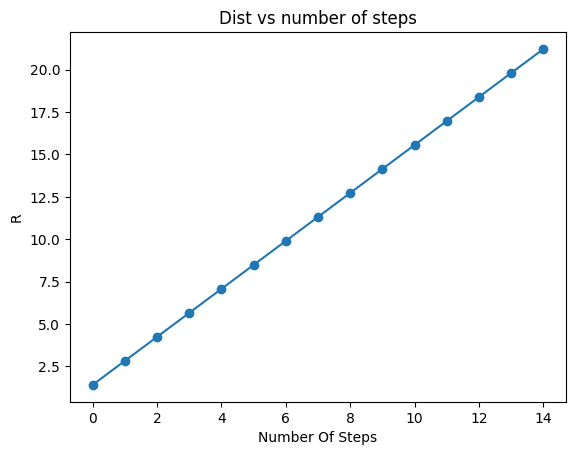

In [10]:
# Separate into x and y values
x, y = zip(*plot)
print(y)
# Plot the data
plt.plot(x, y, marker='o')

# Add labels and title
plt.xlabel('Number Of Steps')
plt.ylabel('R')
plt.title('Dist vs number of steps')

# Show the plot
plt.show()

# Plots

In [11]:
from grahping import prepare_coordinate_grids,contour_plot,surface_plot,scatter_plot,vector_field_plot,density_plot,heatmap_plot
label1 = "|Φi⟩ =|↑> X |12>"
label2 = "|Φi⟩ = |↓>  X | 12 > "
label3 = "|Φsym⟩ = √2( |↑⟩ + i| ↓⟩ )⊗|12⟩"
val = [grid2,grid3,grid4]
label = [label1,label2,label3]

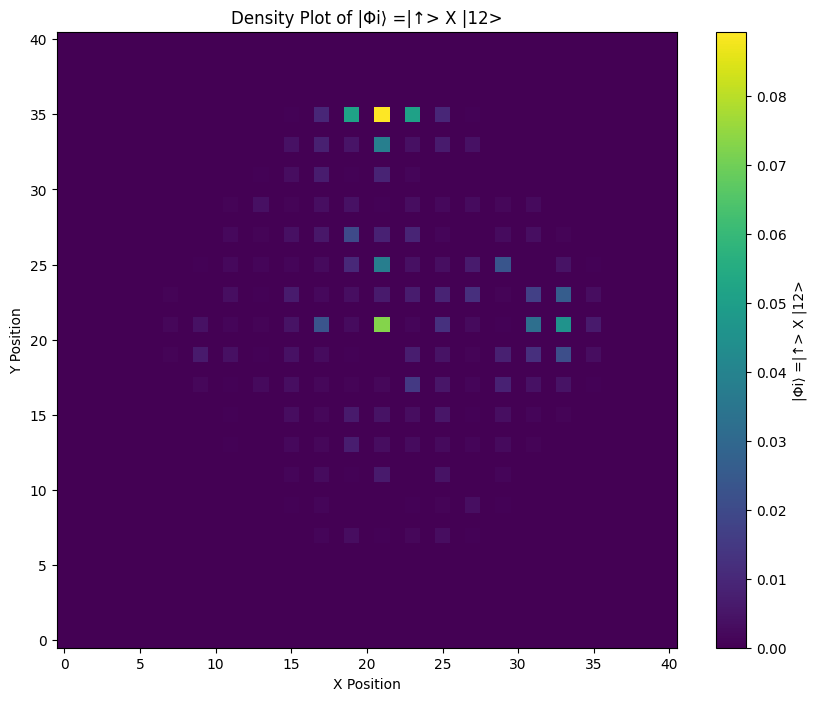

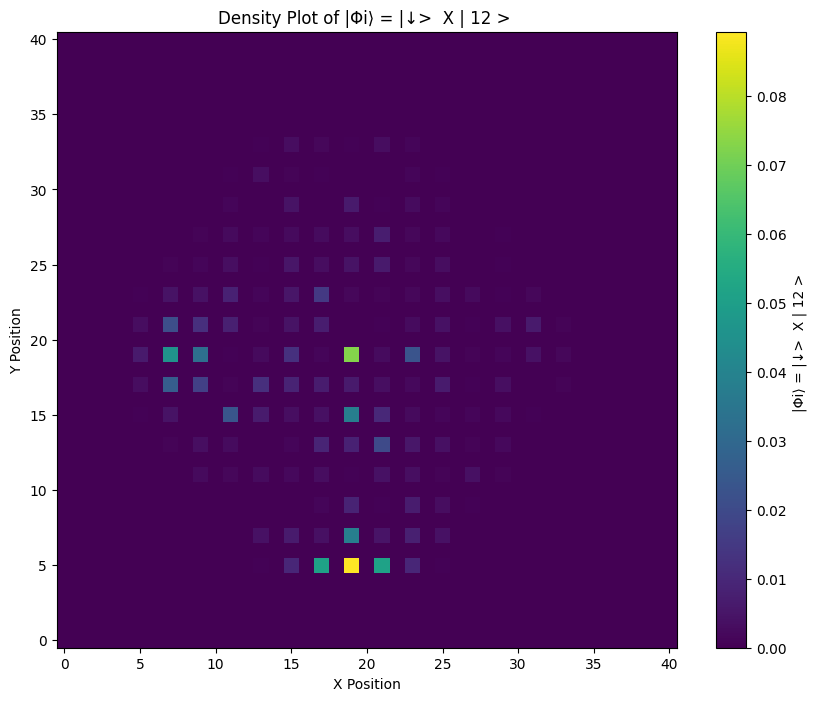

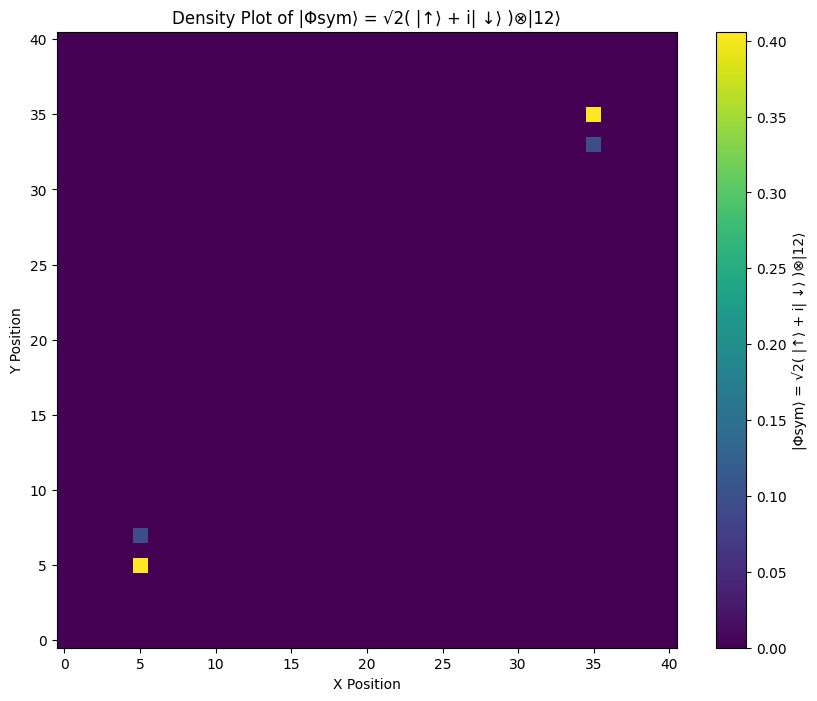

In [12]:
for i in range(0,3):
    density_plot(val[i],label[i])

# Variation 2 
## theta x 0 -> n , y n -> 0 

In [13]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,up)
zero_ket.shape

state = init_state
coin_vari = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
coin_adj = np.kron(np.eye(n,n),coin_vari)
print(state)
i = 0

for i in range (0,step_count):
    coin_adj_x = coin_change(i)
    coin_adj_y = coin_change(step_count-i)
    # print(coin_adj)
    state = coin_adj_y @ state
    state = S_x @ state 
    state = coin_adj_x @ state 
    state = S_y @ state
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))

grid5 = pos_prob.reshape(x_limit,y_limit)
# print(grid2)

[0. 0. 0. ... 0. 0. 0.]
1.0


In [14]:
zero_ket = np.kron(x_ket,y_ket)
init_state = np.kron(zero_ket,down)
zero_ket.shape

state = init_state
coin_vari = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
coin_adj = np.kron(np.eye(n,n),coin_vari)
print(state)
i = 0

for i in range (0,step_count):
    coin_adj_x = coin_change(i)
    coin_adj_y = coin_change(step_count-i)
    # print(coin_adj)
    state = coin_adj_y @ state
    state = S_x @ state 
    state = coin_adj_x @ state 
    state = S_y @ state
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state
for i in range(state.shape[0]):
    state_prob[i] = np.abs(state[i])**2  # Calculate squared magnitude

pos_prob = np.zeros((n, 1))

# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i]
    else:
        pos_prob[(i - 1) // 2] += state_prob[i]
print(np.sum(pos_prob))

grid6 = pos_prob.reshape(x_limit,y_limit)
# print(grid2)

[0. 0. 0. ... 0. 0. 0.]
1.0


In [15]:
up_coef = 1/np.sqrt(2)
down_coef = 1j/np.sqrt(2)
coin_adj2 = np.kron(np.eye(n,n),coin)
spin_superpos = up_coef*up + down_coef*down
init_state3 = np.kron(zero_ket,spin_superpos)
state = init_state3
for i in range (0,step_count):
    coin_adj_x = coin_change(i)
    coin_adj_y = coin_change(step_count-i)
    # print(coin_adj)
    state = coin_adj_y @ state
    state = S_x @ state 
    state = coin_adj_x @ state 
    state = S_y @ state
# print(state)
# Initialize state_prob to store the probabilities (squared magnitudes)
state_prob = np.zeros_like(state)

# Calculate the probability for each state by multiplying with its complex conjugate
for i in range(state.shape[0]):
    state_prob[i] = state[i] * np.conjugate(state[i])

pos_prob = np.zeros((n, 1))
# Combine the probabilities for even/odd indexed positions
for i in range(0, 2 * n):
    if i % 2 == 0:
        pos_prob[i // 2] += state_prob[i].real
    else:
        pos_prob[(i - 1) // 2] += state_prob[i].real
#Convert to 2d grid 
print(np.sum(pos_prob))
grid7 = pos_prob.reshape(x_limit,y_limit)
# for i in range(0,n):
#     x = i % x_limit
#     y = i // y_limit
#     grid4[x][y] = pos_prob[i,0]
# print(grid)

0.9999999999999994


In [16]:
val2= [grid5,grid6,grid7]

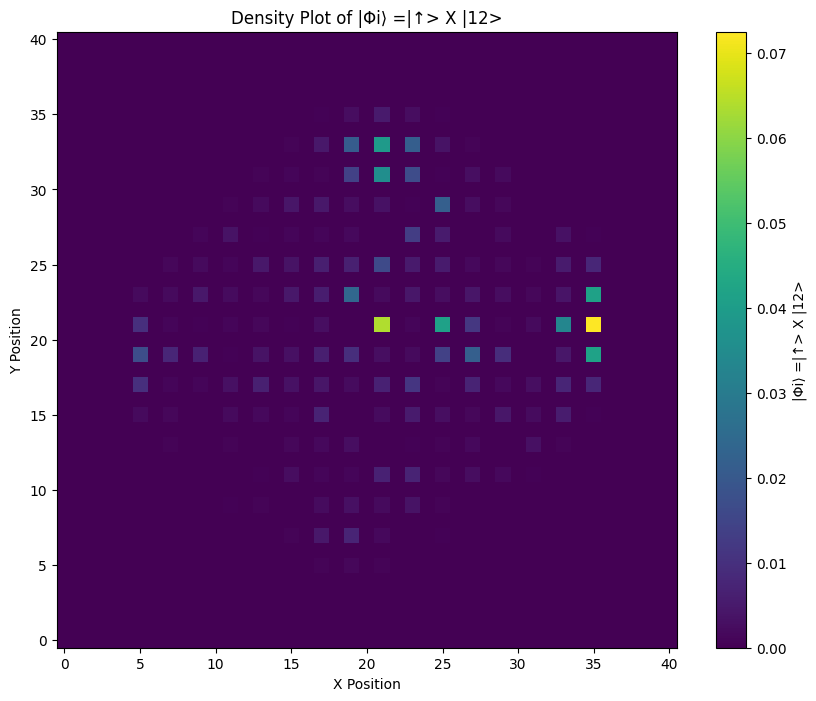

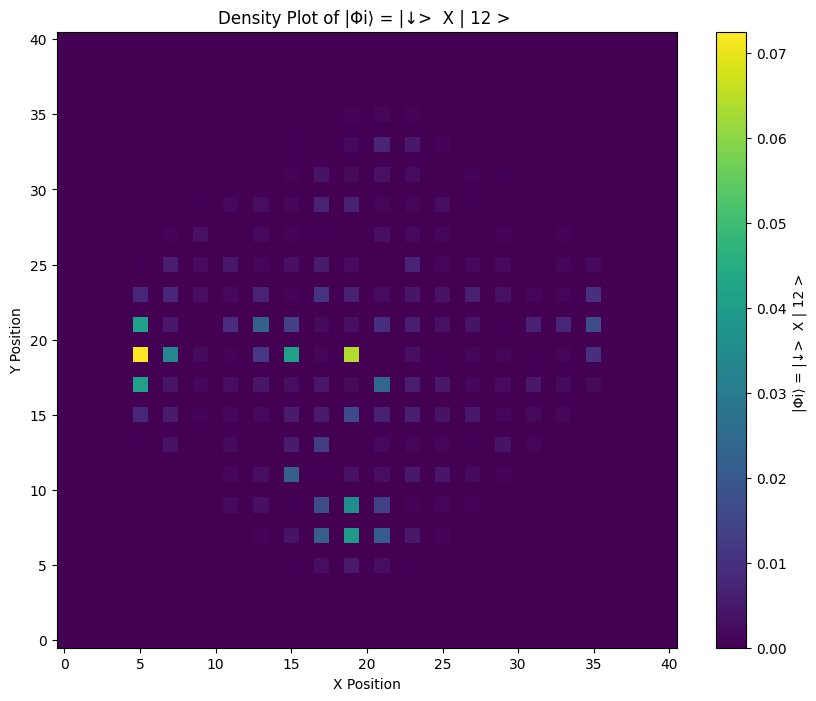

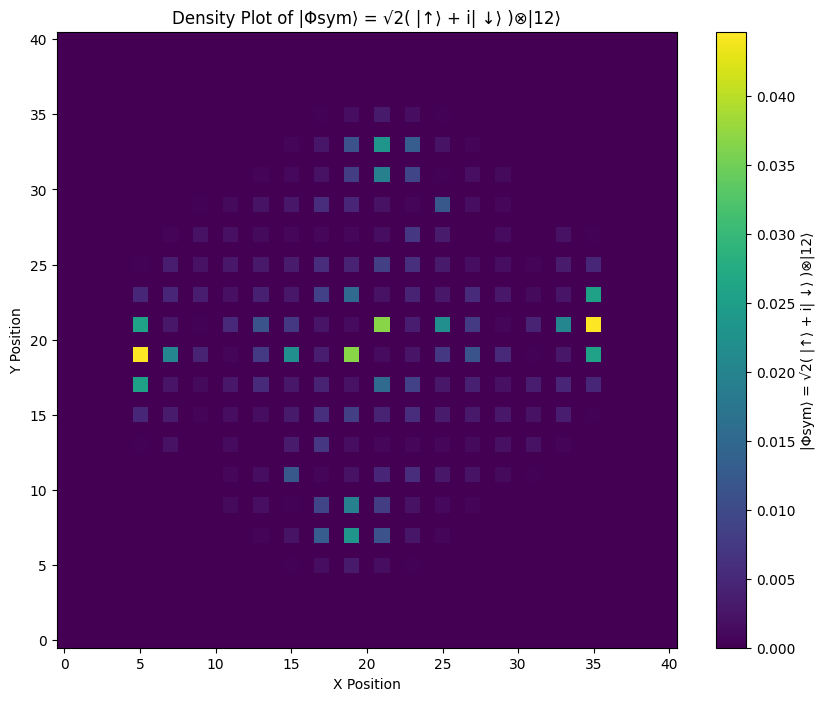

In [17]:
for i in range(0,3):
    density_plot(val2[i],label[i])